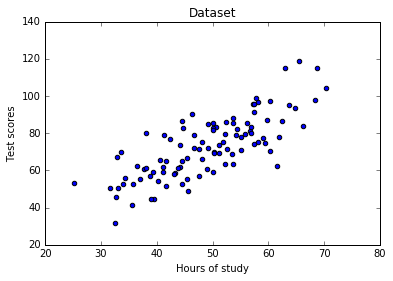

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


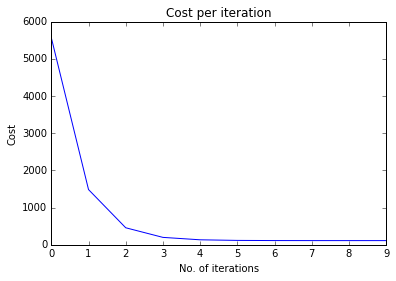

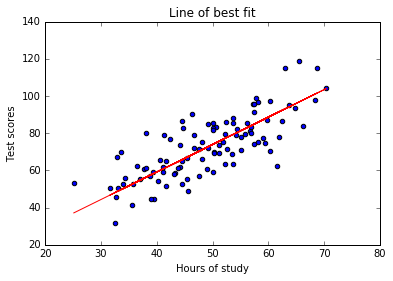

In [6]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt
points = genfromtxt('data.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    return total_cost/N


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))-
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    return b_updated, m_updated
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

print ('Optimized b:', b)
print ('Optimized m:', m)

print ('Minimized cost:', compute_cost(b, m, points))




plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()


plt.scatter(x, y)
pred = m * x + b
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()